<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                       -                                       |                                       -                                       |                                       -                                       |
|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
|  [Exercise 1 (blob classification)](<#Exercise-1-(blob-classification&#41;>)  | [Exercise 2 (plant classification)](<#Exercise-2-(plant-classification&#41;>) |  [Exercise 3 (word classification)](<#Exercise-3-(word-classification&#41;>)  |
|       [Exercise 4 (spam detection)](<#Exercise-4-(spam-detection&#41;>)       |                                                                               |                                                                               |



## ML: Naive Bayes classification

*Classification* is one form of supervised learning. The aim is to annotate all data points with a label. Those points that have the same label belong to the same class. There can be two or more labels. For example, a lifeform can be classified (coarsely) with labels animal, plant, fungi, archaea, bacteria, protozoa, and chromista. The data points are observed to have certain features that can be used to predict their labels. For example, if it is has feathers, then it is most likely an animal.

In supervised learning an algorithm is first given a training set of data points with their features and labels. Then the algorithm learns from these features and labels a (probabilistic) model, which can afterwards be used to predict the labels of previously unseen data.

*Naive Bayes classification* is a fast and simple to understand classification method. Its speed is due to some simplifications we make about the underlying probability distributions, namely, the assumption about the independence of features. Yet, it can be quite powerful, especially when there are enough features in the data.

Suppose we have for each label L a probability distribution. This distribution gives probability for each possible combination of features (a feature vector):

$$P(features | L).$$

The main idea in Bayesian classification is to reverse the direction of dependence: we want to predict the label based on the features:

$$P(L | features)$$

This is possible by [the Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):

$$P(L | features) = \frac{P(features | L)P(L)}{P(features)}.$$

Let's assume we have to labels L1 and L2, and their associated distributions: $P(features | L1)$ and $P(features | L2)$. If we have a data point with "features", whose label we don't know, we can try to predict it using the ratio of posterior probabilities:

$$\frac{P(L1 | features)}{P(L2 | features)} = \frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}.$$

If the ratio is greater than one, we label our data point with label L1, and if not, we give it label L2.
The prior probabilities P(L1) and P(L2) of labels can be easily found out from the input data, as for each data point we also have its label. Same goes for the probabilities of features conditioned on the label.

We first demonstrate naive Bayes classification using Gaussian distributions.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

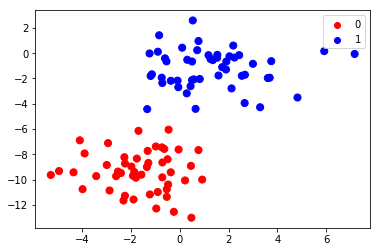

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();
#plt.colorbar();

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

Naive Bayes algorithm fitted two 2-dimensional Gaussian distribution to the data. The means and the variances define these distributions completely.

In [4]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Standard deviations: [[ 2.06097005  2.47716872]
 [ 3.33164807  2.22401384]]


Let's plot these distributions. First we define a helper function to draw an ellipse that gives the standard deviation in each direction from the origo.

In [5]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

Then we do the actual plotting:

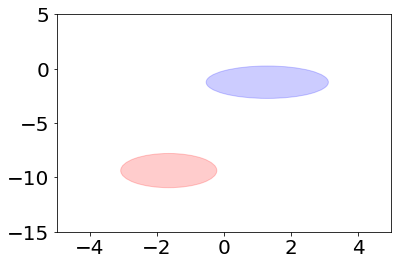

In [6]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

*Accuracy score* gives a measure about how well we managed to predict the labels. The maximum value is 1.0.

In [7]:
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

Accuracy score is 1.0


The score was the best possible, which is not a surprise, since we tried to predict the data we had already seen! Later we will split our data into two parts: one for learning the model and the other for testing its predictive skills.

### Another example

Let's generate some more data using multivariate normal distributions.

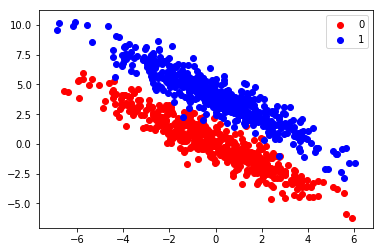

In [8]:
cov=np.array([[ 4.68, -4.32],
 [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

The two clusters seem to be quite separate. Let's try naive Bayesian classification on this data.

In [9]:
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [10]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-0.11860779  0.12869494]
 [ 0.03765647  3.98121459]]
Standard deviations: [[ 5.18579166  4.69249675]
 [ 5.0005392   4.84702521]]


Accuracy score is 0.822


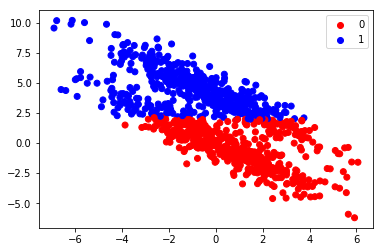

In [11]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)

Even thought the score is quite good, we can see from the plot that the algorithm didn't have good models for the data. We can plot the models the algorithm used:

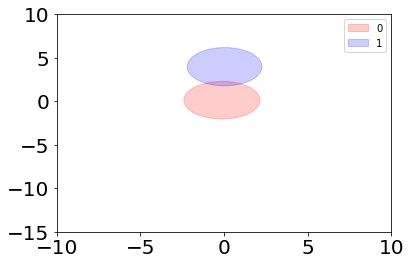

In [12]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);

The problem with naive Bayesian classification is that it tries to model the data using Gaussian distributions, which are aligned along the x and y axes. With this example data we would have needed Gaussian distributions which are "tilted".

### Text classification

We next try to classify a set of messages that were posted on a public forum. The messages were divided into groups by the topics. So, we have a data set ready for classification testing. Let's first load this data using scikit-learn and print the message categories.

In [13]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We concentrate on four message categories only. The tool `fetch_20newsgroups` allows us to easily split the data into training and testing data.

In [14]:
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.crypt']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Let's see what we got:

In [15]:
print("Training data:", "Data:", str(type(train.data)), len(train.data), "Target:", str(type(train.target)), len(train.target))
print("Test data:", "Data:", str(type(test.data)), len(test.data), "Target", str(type(test.data)), len(test.target))

Training data: Data: <class 'list'> 2364 Target: <class 'numpy.ndarray'> 2364
Test data: Data: <class 'list'> 1574 Target <class 'list'> 1574


We use as features the frequencies of each word in the dataset. That is, there are as many features as there are distinct words in the dataset. We denote the number of features by $f$. As the features are now counts, it is sensible to use multinomial distribution instead of Gaussian. 

Let's try to model these messages using multinomial distributions. Each message category has its own distribution. A multinomial distribution has $f$ non-negative parameters $\theta_1,\ldots , \theta_f$, which sum up to one. For example, the parameter $\theta_3$ might tell the the probability of the word "board" appearing in a message of the category this distribution is describing.

In scikit-learn there is a class `CountVectorizer` that converts messages in form of text strings to feature vectors. We can integrate this conversion with the model we are using (multinomial naive Bayes), so that the conversion happens automatically as part of the `fit` method. We achive this integration using the `make_pipeline` tool.

In [16]:
#from sklearn.feature_extraction.text import TfidfVectorizer  # an alternative feature extractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels_fitted = model.predict(test.data)
print("Accuracy score is", accuracy_score(labels_fitted, test.target))

Accuracy score is 0.920584498094


The classifier seem to work quite well! Notice that now we used separate data for testing the model.

Let's have a closer look at the resulting feature vectors.

In [17]:
vec=CountVectorizer()
features=vec.fit_transform(train.data)
print("Type of feature matrix:", type(features))
print(features[0,:])        # print the features of the first sample point

Type of feature matrix: <class 'scipy.sparse.csr.csr_matrix'>
  (0, 20579)	1
  (0, 19220)	1
  (0, 29697)	1
  (0, 6320)	1
  (0, 25926)	1
  (0, 34222)	1
  (0, 31398)	1
  (0, 17883)	1
  (0, 16809)	1
  (0, 34425)	1
  (0, 23460)	1
  (0, 21787)	1
  (0, 11068)	1
  (0, 29494)	1
  (0, 29505)	1
  (0, 18436)	1
  (0, 24025)	1
  (0, 25336)	1
  (0, 12577)	1
  (0, 27517)	1
  (0, 30641)	1
  (0, 5980)	1
  (0, 29104)	1
  (0, 27521)	1
  (0, 11100)	1
  :	:
  (0, 17310)	1
  (0, 25400)	1
  (0, 23118)	1
  (0, 31686)	6
  (0, 27158)	1
  (0, 18085)	1
  (0, 12580)	1
  (0, 2100)	1
  (0, 20381)	1
  (0, 32729)	1
  (0, 23854)	2
  (0, 11079)	1
  (0, 15109)	2
  (0, 20509)	1
  (0, 23858)	1
  (0, 26624)	1
  (0, 30377)	1
  (0, 16034)	1
  (0, 19099)	1
  (0, 13317)	6
  (0, 34790)	6
  (0, 9553)	4
  (0, 21852)	5
  (0, 18962)	3
  (0, 15373)	1


The feature matrix is stored in sparse format, that is, only the nonzero counts are stored. How many words were in the first message?

In [18]:
print("Number of words:", features[0,:].sum())
col = vec.vocabulary_["it"]   # Get the column of 'it' word in the feature matrix
print(f"Word 'it' appears in the first message {features[0, col]} times.")
print()
print(train.data[0])   # Let's print the corresponding message as well
#print(vec.get_feature_names())

Number of words: 177
Word 'it' appears in the first message 2 times.

From: jgfoot@minerva.cis.yale.edu (Josh A. Goldfoot)
Subject: Re: Organized Lobbying for Cryptography
Organization: Yale University
Lines: 21
Distribution: inet
Reply-To: jgfoot@minerva.cis.yale.edu
NNTP-Posting-Host: minerva.cis.yale.edu
X-Newsreader: TIN [version 1.1 Minerva PL9]

Shaun P. Hughes (sphughes@sfsuvax1.sfsu.edu) wrote:
: In article <1r3jgbINN35i@eli.CS.YALE.EDU> jgfoot@minerva.cis.yale.edu writes:
[deletion]
: >Perhaps these encryption-only types would defend the digitized porn if it
: >was posted encrypted?
: >
: >These issues are not as seperable as you maintain.
: >

: Now why would anyone "post" anything encrypted? Encryption is only of 
: use between persons who know how to decrypt the data.

: And why should I care what other people look at? 

I was responding to another person (Tarl Neustaedter) who held that the
EFF wasn't the best organization to fight for crytography rights since the
EFF also

#### <div class="alert alert-info">Exercise 1 (blob classification)</div>

Write function `blob_classification` that gets feature matrix X and label vector y as parameters. It should then return the accuracy score of the prediction. Do the prediction using `GaussianNB`, and use `train_test_split` function from `sklearn` to split the dataset in to two parts: one for training and one for testing. Give parameter `random_state=0` to the splitting function so that the result is deterministic. Use training set size of 75% of the whole data.
<hr/>

#### <div class="alert alert-info">Exercise 2 (plant classification)</div>

Write function `plant_classification` that does the following:

* loads the iris dataset using sklearn (`sklearn.datasets.load_iris`)
* splits the data into training and testing part using the `train_test_split` function so that the training set size is 80% of the whole data (give the call also the `random_state=0` argument to make the result deterministic)
* use Gaussian naive Bayes to fit the training data
* predict labels of the test data
* the function should return the accuracy score of the prediction performance (`sklearn.metrics.accuracy_score`)
<hr/>

#### <div class="alert alert-info">Exercise 3 (word classification)</div>

This exercise can give four points at maximum!

In this exercise we create a model that tries to label previously unseen words to be either Finnish or English.

Part 1.

Write function `get_features` that gets a one dimensional np.array, containing words, as parameter. It should return a feature matrix of shape (n, 29), where n is the number of elements of the input array. There should be one feature for each of the letters in the following alphabet: "abcdefghijklmnopqrstuvwxyzäö-". The values should be the number of times the corresponding character appears in the word.

Part 2.

Write function `contains_valid_chars` that takes a string as a parameter and returns the truth value of whether all the characters in the string belong to the alphabet or not.

Part 3.

Write function `get_features_and_labels` that returns the tuple (X, y) of the feature matrix and the target vector. Use the labels 0 and 1 for Finnish and English, respectively. Use the supplied functions load_finnish() and load_english() to get the lists of words. Filter the lists in the following ways:

* Convert the Finnish words to lowercase, and then filter out those words that contain characters that don't belong to the alphabet.
* For the English words first filter out those words that begin with an uppercase letter to get rid of proper nouns. Then proceed as with the Finnish words.

Use get_features function you made earlier to form the feature matrix.

Part 4.

We have earlier seen examples where we split the data into learning part and testing part. This way we can test whether the model can really be used to predict unseen data. However, it can be that we had bad luck and the split produced very biased learning and test datas. To counter this, we can perform the split several times and take as the final result the average from the different splits. This is called [cross validation](<https://en.wikipedia.org/wiki/Cross-validation_(statistics)>).

Create `word_classification` function that does the following:

Use the function `get_features_and_labels` you made earlier to get the feature matrix and the labels. Use multinomial naive Bayes to do the classification. Get the accuracy scores using the `sklearn.model_selection.cross_val_score` function; use 5-fold cross validation. The function should return a list of five accuracy scores.

The cv parameter of `cross_val_score` can be either an integer, which specifies the number of folds, or it can be a *cross-validation generator* that generates the (train set,test set) pairs. What happens if you pass the following cross-validation generator to `cross_val_score` as a parameter: `sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)`.

Why the difference?
<hr/>

#### <div class="alert alert-info">Exercise 4 (spam detection)</div>

This exercise gives two points if solved correctly!

In the `src` folder there are two files: `ham.txt.gz` and `spam.txt.gz`. The files are preprocessed versions of the files from https://spamassassin.apache.org/old/publiccorpus/. There is one email per line. The file `ham.txt.gz` contains emails that are non-spam, and, conversely, emails in file `spam.txt` are spam. The email headers have been removed, except for the subject line, and non-ascii characters have been deleted.

Write function `spam_detection` that does the following:

* Read the lines from these files into arrays. Use function `open` from `gzip` module, since the files are compressed. From each file take only `fraction` of lines from the start of the file, where `fraction` is a parameter to `spam_detection`, and should be in the range `[0.0, 1.0]`.
* forms the combined feature matrix using `CountVectorizer` class' `fit_transform` method. The feature matrix should first have the rows for the `ham` dataset and then the rows for the `spam` dataset. One row in the feature matrix corresponds to one email.
* use labels 0 for ham and 1 for spam
* divide that feature matrix and the target label into training and test sets, using `train_test_split`. Use 75% of the data for training. Pass the random_state parameter from `spam_detection` to `train_test_split`.
* train a `MultinomialNB` model, and use it to predict the labels for the test set

The function should return a triple consisting of

* accuracy score of the prediction
* size of test sample
* number of misclassified sample points

Note. The tests use the `fraction` parameter with value 0.1 to ease to load on the TMC server. If full data were used and the solution did something non-optimal, it could use huge amounts of memory, causing the solution to fail.
<hr/>

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
